In [20]:
import sys
import os
sys.path.append('../src')
sys.path.append('../src/vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import matplotlib.colors as mcolors
from transform import get_temperature


In [21]:
'''
Change this based on which simulation you would like to look at
'''

simulation_name = "magshockz-v1.1.1d" 
proj_dir = os.getcwd().removesuffix("analysis_scripts")
print(proj_dir)
# move into that directory
os.chdir(f'../simulations/raw_data/{simulation_name}')
print(f'current directory: {os.getcwd()}')
species_list = os.listdir('MS/DENSITY')

/home/david/MagShockZ/simulations/raw_data/magshockz-v1.1.1d


FileNotFoundError: [Errno 2] No such file or directory: '../simulations/raw_data/magshockz-v1.1.1d'

/tmp/ipykernel_348309/1245457291.py:12: RuntimeWarning: divide by zero encountered in log
  im = axs[i].imshow(np.log(np.abs(phase_space[0][timestep])), origin='lower', \


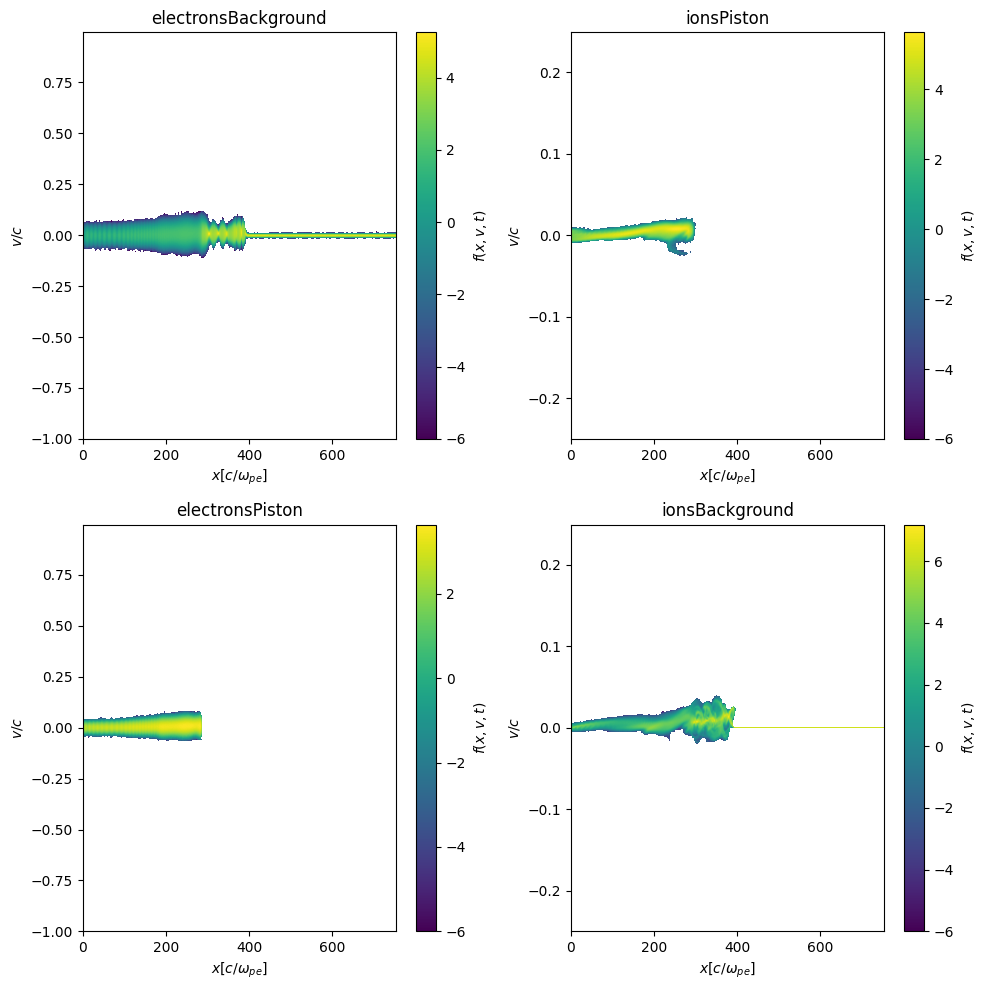

In [3]:
## Look at phase space at specified timestep

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
timestep = -1 # change this

# Flatten the axes array for easy iteration
axs = axs.flatten()


for i in range(len(species_list)):
    phase_space = get_osiris_quantity_2d(f'MS/PHA/p1x1/{species_list[i]}/')
    im = axs[i].imshow(np.log(np.abs(phase_space[0][timestep])), origin='lower', \
                       extent=[phase_space[5][0], phase_space[5][-1],phase_space[6][0],phase_space[6][-1]], aspect='auto', vmin = -6)
    fig.colorbar(im,label=r'$f(x,v,t)$')
    axs[i].set_title(f'{species_list[i]}')
    axs[i].set_xlabel(r'$x [c/\omega_{pe}]$')
    axs[i].set_ylabel(r'$v/c$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_348309/597487773.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f't = {round(quantity[4][t],1)} $[1/\omega_p]$')
/tmp/ipykernel_348309/597487773.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(quantity[0][t][vmin:vmax,xmin:xmax])), origin='lower',


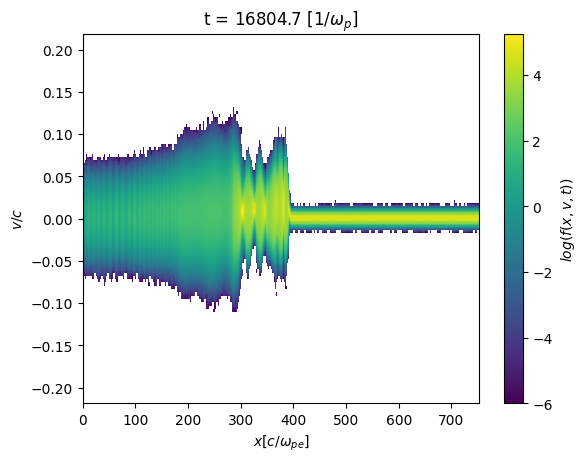

In [7]:
# Make a movie of phase space

i = 0 # change this to the species you want to look at 
quantity = get_osiris_quantity_2d(f'{proj_dir}/simulations/raw_data/{simulation_name}/MS/PHA/p1x1/{species_list[i]}/')

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='charge-density-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()


plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"../../../analysis_scripts/{species_list[i]}_phase_space.mp4", dpi=400):
    for t in range(len(quantity[4])):
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(quantity[4][t],1)} $[1/\omega_p]$')
        xmin = 0; xmax = -1
        vmin = 200; vmax = -200
        plt.imshow(np.log(np.abs(quantity[0][t][vmin:vmax,xmin:xmax])), origin='lower',
                   extent=[quantity[5][xmin], quantity[5][xmax],quantity[6][vmin],quantity[6][vmax]],
                   aspect='auto', vmin = -6)
        plt.colorbar(label=r'$log(f(x,v,t))$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        writer.grab_frame()

/tmp/ipykernel_348309/1828910578.py:14: RuntimeWarning: divide by zero encountered in log
  data = np.log(np.abs(quantity[0][-1]))  # Example: using the last timestep data and log scale for visualization


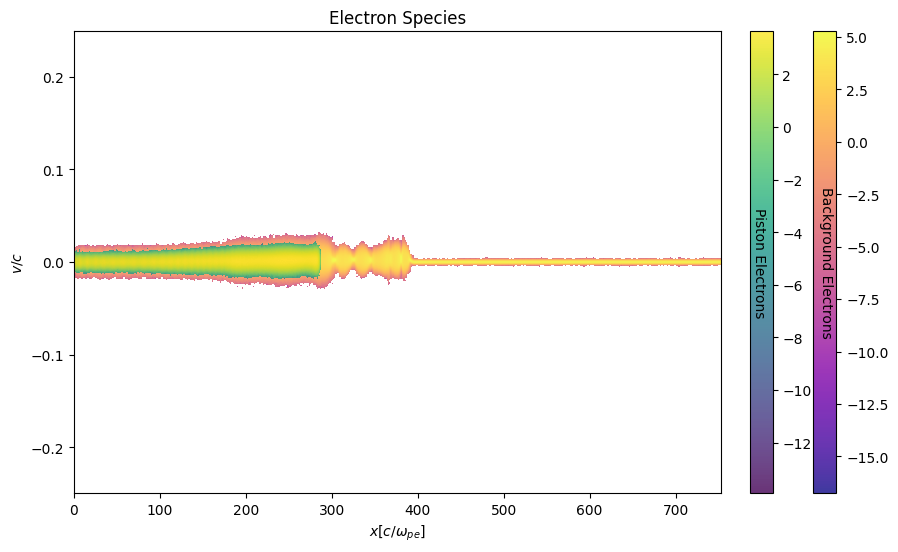

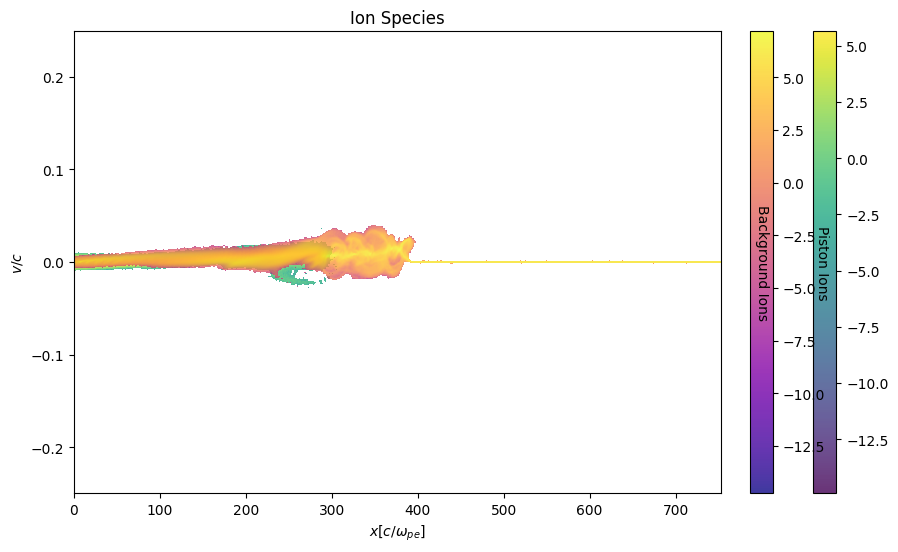

In [13]:
# Initialize figures for electron and ion species


fig_electron, ax_electron = plt.subplots(figsize=(10, 6))
fig_ion, ax_ion = plt.subplots(figsize=(10, 6))

# Variables to aggregate data
electron_data = []
ion_data = []

# Loop through species_list and process data
for species in species_list:
    quantity = get_osiris_quantity_2d(f'{proj_dir}/simulations/raw_data/{simulation_name}/MS/PHA/p1x1/{species}/')
    data = np.log(np.abs(quantity[0][-1]))  # Example: using the last timestep data and log scale for visualization
    
    if species.startswith("electron"):
        electron_data.append(data)
    else:
        ion_data.append(data)

x_min, x_max = quantity[5][0], quantity[5][-1]
y_min, y_max = quantity[6][0] ,quantity[6][-1]

if electron_data:
    # Plot the first electron dataset with correct boundaries
    im_electron1 = ax_electron.imshow(electron_data[0], origin='lower', aspect='auto', cmap='plasma', alpha = 0.8, extent=[x_min, x_max, y_min, y_max])
    cbar1 = fig_electron.colorbar(im_electron1, ax=ax_electron, fraction=0.046, pad=0.04)
    cbar1.set_label('Background Electrons', rotation=270, labelpad=-40)

    # Plot the second electron dataset on the same axes with a different color map and correct boundaries
    im_electron2 = ax_electron.imshow(electron_data[1], origin='lower', aspect='auto', cmap='viridis', alpha=0.8, extent=[x_min, x_max, y_min, y_max])
    cbar2 = fig_electron.colorbar(im_electron2, ax=ax_electron, fraction=0.046, pad=0.04, location='right')
    cbar2.set_label('Piston Electrons', rotation=270, labelpad=-33)

    # Set titles and labels
    ax_electron.set_title('Electron Species')
    ax_electron.set_xlabel(r'$x [c/\omega_{pe}]$')
    ax_electron.set_ylabel(r'$v/c$')

if ion_data:
    # Plot the first ion dataset with correct boundaries
    im_ion1 = ax_ion.imshow(ion_data[0], origin='lower', aspect='auto', cmap='viridis', alpha=0.8, extent=[x_min, x_max, y_min, y_max])
    cbar1 = fig_ion.colorbar(im_ion1, ax=ax_ion, fraction=0.046, pad=0.04)
    cbar1.set_label('Piston Ions', rotation=270, labelpad=-43)

    # Plot the second ion dataset on the same axes with a different color map and correct boundaries
    im_ion2 = ax_ion.imshow(ion_data[1], origin='lower', aspect='auto', cmap='plasma', alpha=0.8, extent=[x_min, x_max, y_min, y_max])
    cbar2 = fig_ion.colorbar(im_ion2, ax=ax_ion, fraction=0.046, pad=0.04, location='right')
    cbar2.set_label('Background Ions', rotation=270, labelpad=-40)

    # Set titles and labels
    ax_ion.set_title('Ion Species')
    ax_ion.set_xlabel(r'$x [c/\omega_{pe}]$')
    ax_ion.set_ylabel(r'$v/c$')

plt.show()

dict_keys(['time', 'Ek', 'Eemf', 'par_ene', 'B_ene', 'E_ene', 'B1_ene', 'B2_ene', 'B3_ene', 'E1_ene', 'E2_ene', 'E3_ene', 'ene_conserv'])
13


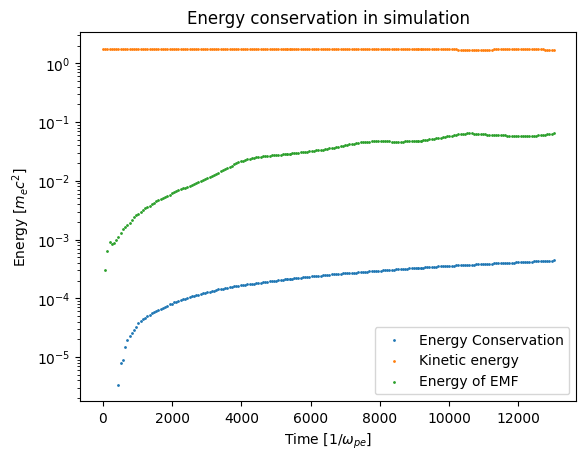

In [14]:
# check that you don't have too much numerical heating


energy_analysis = ene_analysis("HIST/",osirisv='osiris4')
print(energy_analysis.keys())
print(len(energy_analysis))

plt.title("Energy conservation in simulation")
plt.scatter(energy_analysis['time'],energy_analysis['ene_conserv'], label = 'Energy Conservation',s=1)
plt.scatter(energy_analysis['time'],energy_analysis['Ek'], label = 'Kinetic energy',s=1)
plt.scatter(energy_analysis['time'],energy_analysis['Eemf'], label = 'Energy of EMF',s=1)

plt.yscale('log')
plt.xlabel(r'Time $[1/\omega_{pe}]$')
plt.ylabel(r'Energy $[m_e c^2]$')
plt.legend()

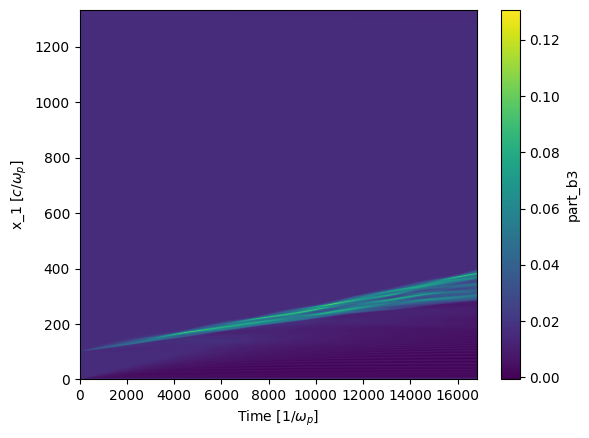

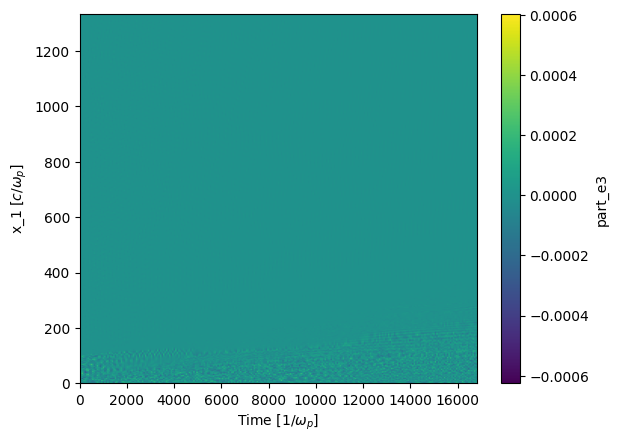

In [24]:
# make a streak plot of B field

i = 3 # i in {1,2,3}

def streak_plot(q, q_0=None) -> None:
    fig, ax = plt.subplots()
        # Make a heatmap of quantity in (t,x) space (sorry Paulo)
    plt.imshow(np.transpose(q[0]), origin='lower', extent=[q[3][0], q[3][-1], q[4][0], q[4][-1]], aspect='auto')

        # If vysxd.data_object timeshot is supplied, use this to label axes
    if (q_0 != None):
        plt.ylabel(f"{q_0.AXIS1_NAME} [${q_0.AXIS1_UNITS}$]")
        plt.xlabel(f"Time [${q_0.TIME_UNITS}$]")
        plt.colorbar(label=q_0.DATA_NAME)


b = get_osiris_quantity_1d(f'MS/FLD/part_b{i}/')
b_0 = vysxd_get_data(f'MS/FLD/part_b{i}/part_b{i}-000000.h5')
streak_plot(b, b_0)

e = get_osiris_quantity_1d(f'MS/FLD/part_e{i}/')
e_0 = vysxd_get_data(f'MS/FLD/part_e{i}/part_e{i}-000000.h5')
streak_plot(e, e_0)

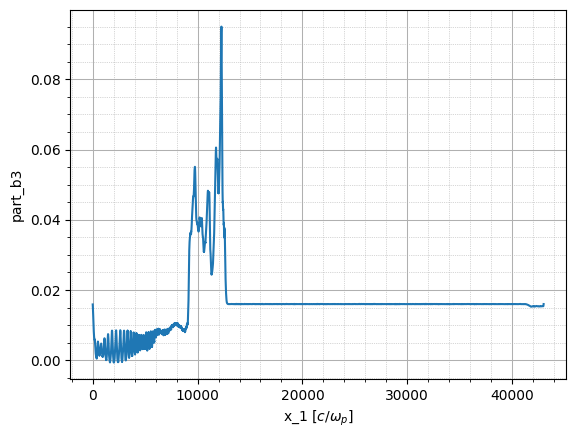

In [15]:
# Make 1D profile of last timestep
timestep = -1

def plot_last_timestep(q,q_0):
    def pretty_plot():
        plt.grid(visible=True,which='major',lw=.75)
        plt.grid(visible=True,which='minor',ls= ':',lw=.5)
        plt.minorticks_on()
    pretty_plot()
    plt.plot(q[0][timestep])
    plt.xlabel(f'{q_0.AXIS1_NAME} [${q_0.AXIS1_UNITS}$]')
    plt.ylabel(f'{q_0.DATA_NAME}')
    
plot_last_timestep(b,b_0)

In [16]:
# get temperature out of simulation FINISH THIS


p1x1_path = f'MS/PHA/p1x1/{species_list[i]}/'
ufl1_path = f'MS/UDIST/{species_list[i]}/ufl1/'

p1x1=get_osiris_quantity_2d(p1x1_path)
ufl1=get_osiris_quantity_1d(ufl1_path)



from skimage.transform import resize
'''
Get pressure from phase space data, right now this only works if integrating over x1. Output is NOT NORMALIZED!!!
'''
t_phase = np.array(p1x1[4])
x_phase = np.array(p1x1[5])
v_phase = np.array(p1x1[6]) 

temperature = np.zeros(len(x_phase))

for i in range(len(t_phase)):
    fvsquared = p1x1[0][i,:,:]*np.transpose([v_phase**2]*len(x_phase))
    fv = p1x1[0][i,:,:]*np.transpose([v_phase]*len(x_phase))

    second_moment = np.trapz(fvsquared,axis=0)
    first_moment = np.trapz(fv,axis=0)
    zeroth_moment = np.trapz(p1x1[0][i,:,:],axis=0)

    if (np.shape(p1x1[0][:,0,:]) != np.shape(ufl1[0])):
        ufl1_resize = np.array(resize(ufl1[0], np.shape(p1x1[0][:,0,:]), preserve_range=True))

    temperature = np.vstack((temperature,second_moment-2*ufl1_resize[i]*first_moment+np.square(ufl1_resize[i])*zeroth_moment))

# Don't need that first slice because it is just zeros
temp = temperature[1:,:]
# temp = get_temperature(p1x1 = p1x1,ufl1 = ufl1) # normalization is off and it looks like there is some numerical heating

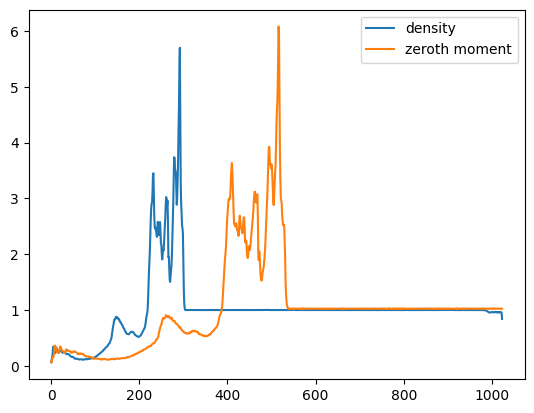

In [41]:
zeroth_moment = np.trapz(p1x1[0],axis=1)
density = get_osiris_quantity_1d(f'MS/DENSITY/{species_list[i]}/charge/')
density_resize = np.array(resize(density[0], np.shape(p1x1[0][:,0,:]), preserve_range=True))

plt.plot(density_resize[-1],label='density')
plt.plot(zeroth_moment[-1]/1000,label='zeroth moment')
plt.legend()
# plt.plot(temp[1])

# print(temp[-1][-1])

In [22]:
from skimage.transform import resize

density = get_osiris_quantity_1d(f'MS/DENSITY/{species_list[i]}/charge/')
plt.plot(density[0])

zeroth_moment = np.trapz(p1x1[0][i,:,:],axis=0)
zeroth_moment = np.array(resize(zeroth_moment, np.shape(density[0]), preserve_range=True))
# plt.plot(density[0])
plt.plot(zeroth_moment[0])


IndexError: list index out of range

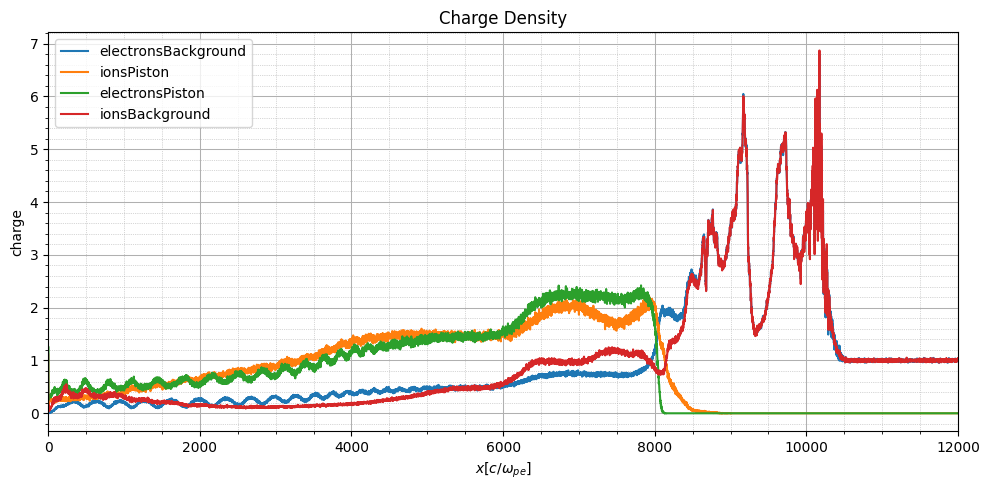

In [23]:
## Look at initial conditions for ion species on the same plot

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(len(species_list)):
    q = get_osiris_quantity_1d(f'MS/DENSITY/{species_list[i]}/charge/')
    q_0 = vysxd_get_data(f'MS/DENSITY/{species_list[i]}/charge/charge-{species_list[i]}-000000.h5')
    
    # Plot each species on the same axis
    ax.plot(np.abs(q[0][timestep]), label=f'{species_list[i]}')

    # Make the plot pretty
    ax.grid(visible=True, which='major', lw=.75)
    ax.grid(visible=True, which='minor', ls=':', lw=.5)
    ax.minorticks_on()

    ax.set_xlabel(r'$x [c/\omega_{pe}]$')
    ax.set_ylabel(f'{q_0.DATA_NAME}')

# Add a title and legend
ax.set_title('Charge Density')
ax.legend()
plt.xlim(0,12000)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()